# 0. 导入数据

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#导入数据
data = pd.read_csv('./Wilt_norm_05(1).csv', header=0)
data.columns = ['GLCM_pan','Mean_Green','Mean_Red','Mean_NIR','SD_pan','id','outlier']

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4839 entries, 0 to 4838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GLCM_pan    4839 non-null   float64
 1   Mean_Green  4839 non-null   float64
 2   Mean_Red    4839 non-null   float64
 3   Mean_NIR    4839 non-null   float64
 4   SD_pan      4839 non-null   float64
 5   id          4839 non-null   int64  
 6   outlier     4839 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 264.8+ KB
None


# 1. 数据可视化探索分析

## 1.1 箱线图

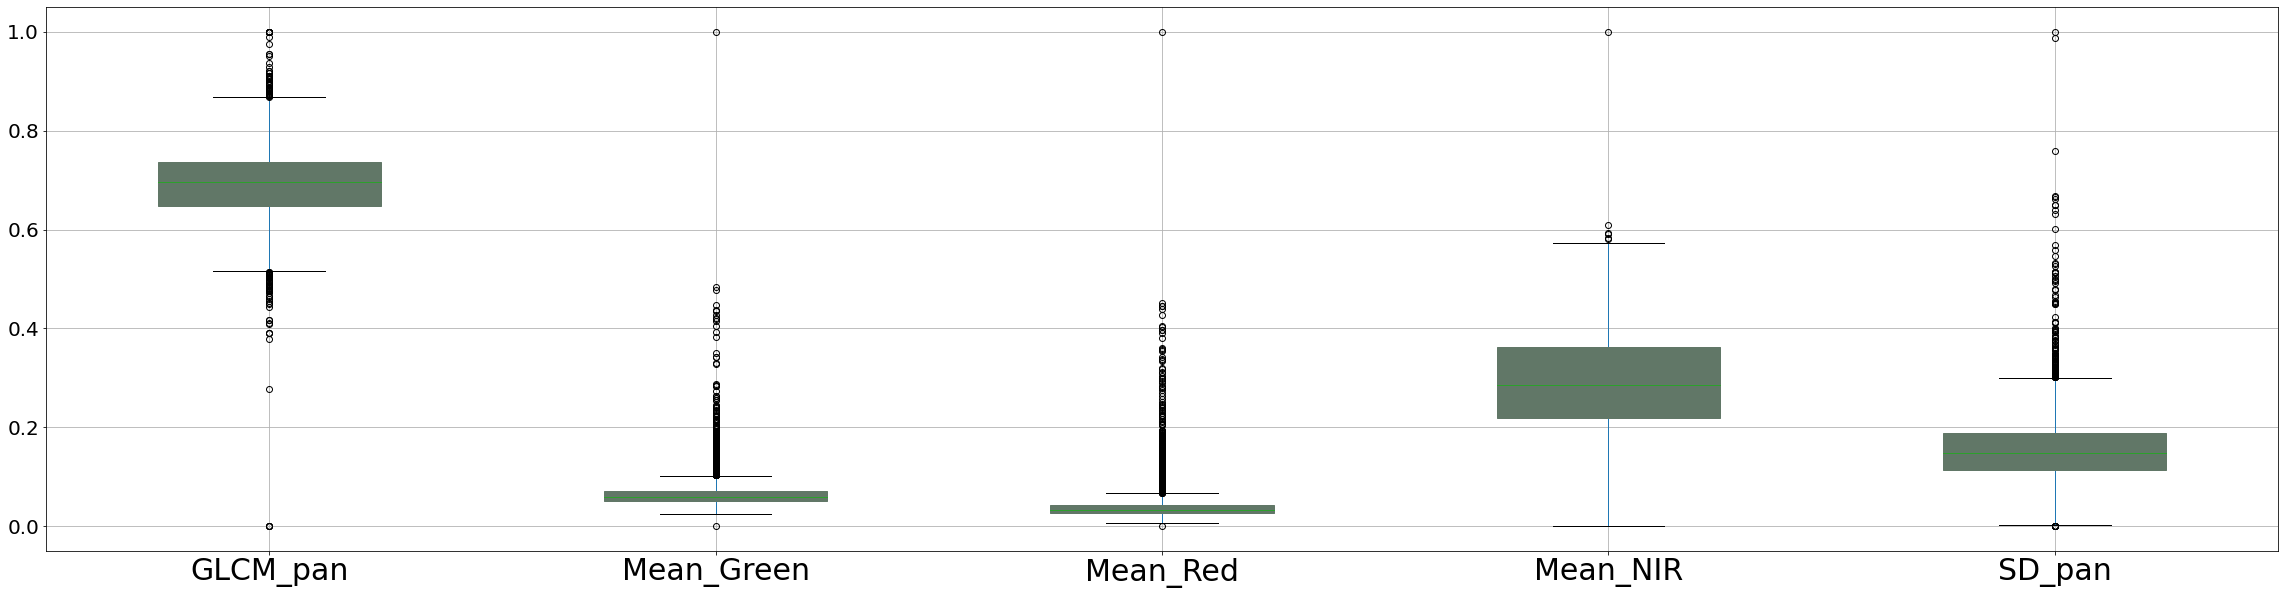

In [3]:
#为每个属性绘制箱线图
data_bp = data.drop(['id','outlier'],axis=1)
bp = data_bp.boxplot(figsize=(40,10),patch_artist = True, boxprops = {'color':'#617767','facecolor':'#617767'})

plt.xticks(fontsize=30)
plt.yticks(fontsize=20)
plt.show()

## 1.2 计算数据集的统计特征

In [4]:
#计算每个属性的统计特征statistical characteristics
GLCM_pan = data['GLCM_pan']
Mean_Green = data['Mean_Green']
Mean_Red = data['Mean_Red']
Mean_NIR = data['Mean_NIR']
SD_pan = data['SD_pan']

def SC(data):
    print("对于属性" + data.name + ":")
    print('  最大值为：%f' %data.max())
    print('  最小值为：%f' %data.min())
    print('  平均值为：%f' %data.mean())
    print('  中位数为：%f' %data.median())
    print('  方差为：%f' %data.var())
    print('  标准差为：%f' %data.std())
    
SC(GLCM_pan)
SC(Mean_Green)
SC(Mean_Red)
SC(Mean_NIR)
SC(SD_pan)

对于属性GLCM_pan:
  最大值为：1.000000
  最小值为：0.000000
  平均值为：0.692136
  中位数为：0.695553
  方差为：0.005386
  标准差为：0.073387
对于属性Mean_Green:
  最大值为：1.000000
  最小值为：0.000000
  平均值为：0.065948
  中位数为：0.058931
  方差为：0.001335
  标准差为：0.036533
对于属性Mean_Red:
  最大值为：1.000000
  最小值为：0.000000
  平均值为：0.042569
  中位数为：0.033065
  方差为：0.001613
  标准差为：0.040159
对于属性Mean_NIR:
  最大值为：1.000000
  最小值为：0.000000
  平均值为：0.290767
  中位数为：0.286039
  方差为：0.010741
  标准差为：0.103638
对于属性SD_pan:
  最大值为：1.000000
  最小值为：0.000000
  平均值为：0.156426
  中位数为：0.148225
  方差为：0.004698
  标准差为：0.068539


## 1.3 可视化

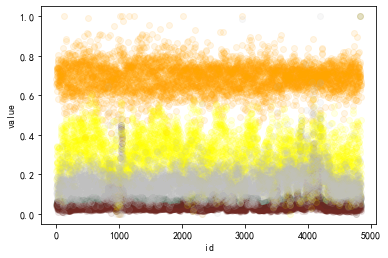

<Figure size 144000x72000 with 0 Axes>

In [5]:
#绘制散点图
x = np.arange(0., 5., 0.2)
plt.xlabel('id')
plt.ylabel('value')
plt.rcParams['font.sans-serif']=['SimHei']  # 中文

plt.scatter(data['id'], data['GLCM_pan'], alpha = 0.1, color = 'orange')
plt.scatter(data['id'], data['Mean_Green'], alpha = 0.1, color = '#617767')
plt.scatter(data['id'], data['Mean_Red'], alpha = 0.1, color = '#6F2923')
plt.scatter(data['id'], data['Mean_NIR'], alpha = 0.1, color = 'yellow')
plt.scatter(data['id'], data['SD_pan'], alpha = 0.1, color = 'silver')

plt.figure(figsize=(600, 300), dpi=240)
plt.show()


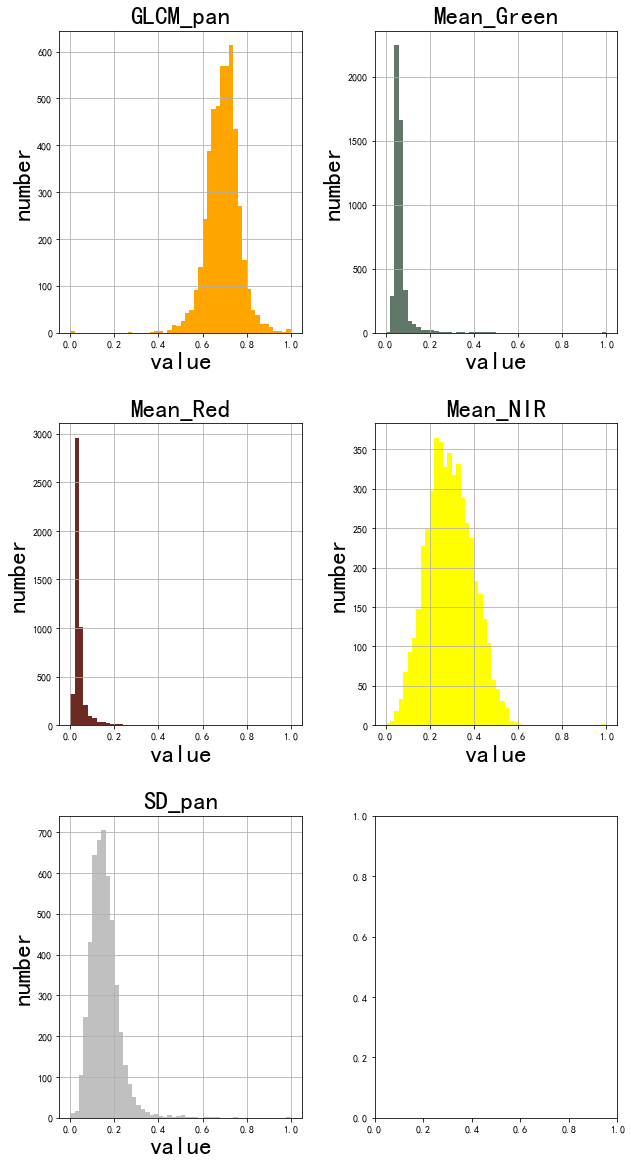

In [6]:
#绘制直方图
fig,axes = plt.subplots(3,2)

data.hist(column='GLCM_pan',ax=axes[0,0],bins=50, color = 'orange')
axes[0,0].set_title('GLCM_pan',fontsize = 25)
axes[0,0].set_xlabel('value',fontsize = 25)
axes[0,0].set_ylabel('number',fontsize = 25)
 
data.hist(column='Mean_Green',ax=axes[0,1],bins=50, color = '#617767')
axes[0,1].set_title('Mean_Green',fontsize = 25)
axes[0,1].set_xlabel('value',fontsize = 25)
axes[0,1].set_ylabel('number',fontsize = 25)

data.hist(column='Mean_Red',ax=axes[1,0],bins=50, color = '#6F2923')
axes[1,0].set_title('Mean_Red',fontsize = 25)
axes[1,0].set_xlabel('value',fontsize = 25)
axes[1,0].set_ylabel('number',fontsize = 25)

data.hist(column='Mean_NIR',ax=axes[1,1],bins=50, color = 'yellow')
axes[1,1].set_title('Mean_NIR',fontsize = 25)
axes[1,1].set_xlabel('value',fontsize = 25)
axes[1,1].set_ylabel('number',fontsize = 25)

data.hist(column='SD_pan',ax=axes[2,0],bins=50, color = 'silver')
axes[2,0].set_title('SD_pan',fontsize = 25)
axes[2,0].set_xlabel('value',fontsize = 25)
axes[2,0].set_ylabel('number',fontsize = 25)

fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.set_size_inches(10,20)

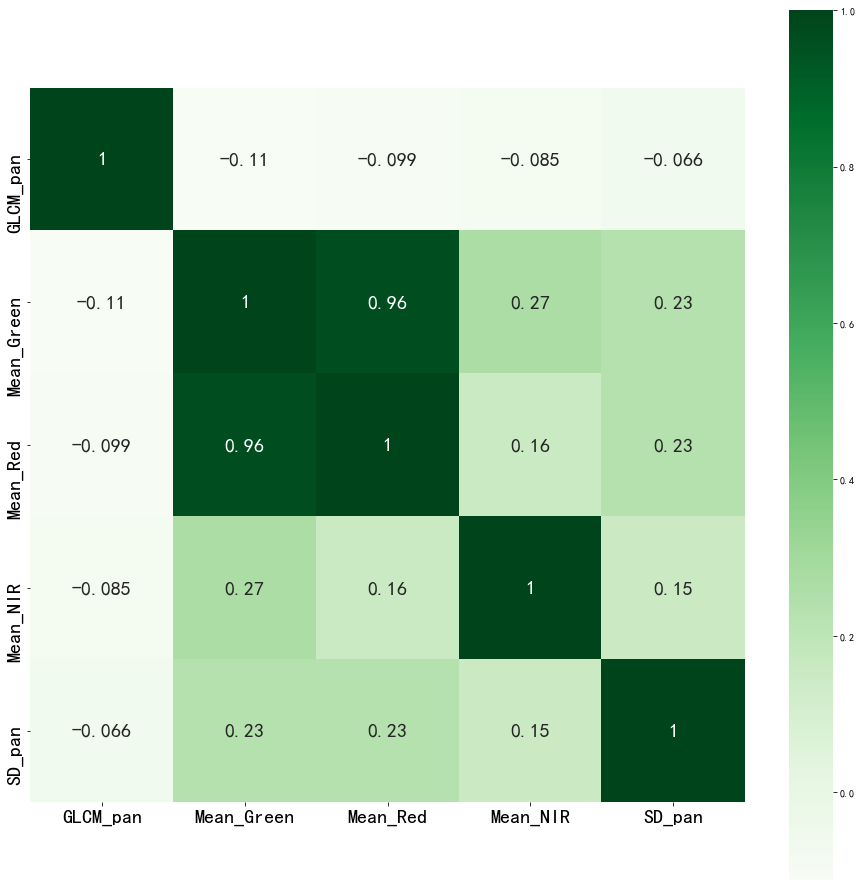

In [8]:
#绘制热力图
data_heat = data.drop(['id','outlier'],axis=1)

plt.subplots(figsize=(16, 16))
sns.heatmap(data_heat.corr(), annot=True, vmax=1, square=True, cmap="Greens",  annot_kws={"fontsize":20})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

(0.0, 1.0)

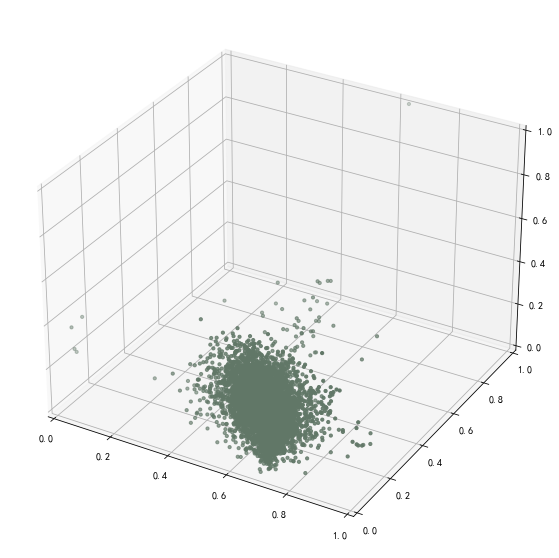

In [7]:
#选取GLCM_pan,Mean_Red,Mean_NIR属性,绘制三维平面图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['GLCM_pan'], data['Mean_Red'], data['Mean_NIR'], 
           s=10, c=None, depthshade=True, color = '#617767')

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)


# 2. 数据清洗

## 2.1 缺失值处理

In [12]:
#处理无“outlier”的数据 识别所有非数字(绕开yes no)
m_data = pd.read_csv('./replace.csv', header=0)
m_data.columns = ['GLCM_pan','Mean_Green','Mean_Red','Mean_NIR','SD_pan','id','outlier']
print("未经处理数据集：")
print(m_data)
print("------------------------------------------------------------")

#识别非数字
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
    return False

#将所有非数字替换为nan
def MyReplace(x):
    if(is_number(x)):
        return x
    elif( x=='yes' or x=='no'):
        return x
    else:
        return np.nan

#遍历每个数据项,输出存在缺失值的数据对象
m_data = m_data.applymap(MyReplace)
print("缺失值替换后数据集：")
print(m_data)
print("------------------------------------------------------------")
print("存在缺失值的数据对象：")
print(m_data.loc[m_data.isnull().any(1)])
print("------------------------------------------------------------")
#删除缺失一半以上属性值的数据对象，
m_data = m_data.loc[m_data.isnull().mean(axis=1) < 0.5]
m_data['GLCM_pan'] = m_data['GLCM_pan'].fillna(data['GLCM_pan'].mean())
m_data['Mean_Green'] = m_data['Mean_Green'].fillna(data['Mean_Green'].mean())
m_data['Mean_Red'] = m_data['Mean_Red'].fillna(data['Mean_Red'].mean())
m_data['Mean_NIR'] = m_data['Mean_NIR'].fillna(data['Mean_NIR'].mean())
m_data['SD_pan'] = m_data['SD_pan'].fillna(data['SD_pan'].mean())
print("缺失值处理后最终数据集：")
print(m_data)

未经处理数据集：
      GLCM_pan Mean_Green  Mean_Red  Mean_NIR    SD_pan    id outlier
0           ��         ��       abc   �ġ�����  0.132110     1     yes
1         12��        NaN  0.041939  0.177275  0.106749     2     yes
2     0.734892   0.047396  0.042926  0.259034  0.143741     3     yes
3     0.698087   0.035317  0.027066  0.127065  0.095697     4     yes
4     0.738927   0.046076  0.040228  0.295501  0.112481     5     yes
...        ...        ...       ...       ...       ...   ...     ...
4834  0.674124    0.04944  0.036148  0.184048  0.110627  4835      no
4835  0.663183   0.091822  0.080968  0.209236  0.085584  4836      no
4836  0.649694   0.075498  0.040665  0.477567  0.158650  4837      no
4837  0.588955   0.046076  0.025532  0.241258  0.052488  4838      no
4838  0.653269   0.037551  0.015354  0.142432  0.146601  4839      no

[4839 rows x 7 columns]
------------------------------------------------------------
缺失值替换后数据集：
      GLCM_pan Mean_Green  Mean_Red  Mean_NIR    SD_pa

## 2.2 去重

In [30]:
data_dup = data.drop(['id'], axis = 1)
data_dup = data_dup.drop_duplicates(subset = None, 
                         keep = 'first', 
                         inplace = False, 
                         ignore_index = False)
print(data_dup)

#接下来的分析使用去重后的结果
data = data_dup

      GLCM_pan  Mean_Green  Mean_Red  Mean_NIR    SD_pan outlier
0     0.656711    0.050984  0.044570  0.218476  0.132110     yes
1     0.680591    0.049425  0.041939  0.177275  0.106749     yes
2     0.734892    0.047396  0.042926  0.259034  0.143741     yes
3     0.698087    0.035317  0.027066  0.127065  0.095697     yes
4     0.738927    0.046076  0.040228  0.295501  0.112481     yes
...        ...         ...       ...       ...       ...     ...
4834  0.674124    0.049440  0.036148  0.184048  0.110627      no
4835  0.663183    0.091822  0.080968  0.209236  0.085584      no
4836  0.649694    0.075498  0.040665  0.477567  0.158650      no
4837  0.588955    0.046076  0.025532  0.241258  0.052488      no
4838  0.653269    0.037551  0.015354  0.142432  0.146601      no

[4819 rows x 6 columns]


## 2.3 噪声识别和处理

噪声数据编号：
[821, 826, 851, 854, 867, 871, 882, 970, 973, 977, 978, 982, 993, 1015, 1016, 1018, 1026, 1030, 1031, 1034, 1042, 1043, 1045, 1046, 1050, 1052, 1053, 2311, 2313, 3669, 3673, 3820, 3822, 3830, 3833, 3861, 3958, 3964, 3965, 3966, 3973, 3975, 3980, 3983, 3984, 3996, 4042, 4049, 4056, 4059, 4065, 4072, 4074, 4075, 4078, 4079, 4082, 4083, 4084, 4085, 4087, 4093, 4094, 4118, 4122, 4123, 4154, 4168, 4170, 4172, 4176, 4182, 4188, 4189, 4191, 4192, 4329, 4818] 78


(0.0, 1.0)

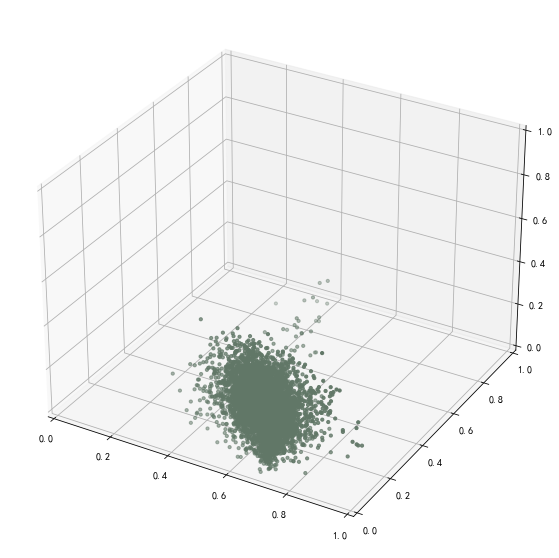

In [14]:
#箱线图法

#基于1.5倍的四分位差计算所有属性上下须对应的值
Q1_GLCM_pan = np.quantile(data['GLCM_pan'], 0.25)
Q3_GLCM_pan = np.quantile(data['GLCM_pan'], 0.75)
low_GLCM_pan = Q1_GLCM_pan - 1.5*(Q3_GLCM_pan - Q1_GLCM_pan)
up_GLCM_pan = Q3_GLCM_pan + 1.5*(Q3_GLCM_pan - Q1_GLCM_pan)
#print(low_GLCM_pan,up_GLCM_pan)

Q1_Mean_Green = np.quantile(data['Mean_Green'], 0.25)
Q3_Mean_Green = np.quantile(data['Mean_Green'], 0.75)
low_Mean_Green = Q1_Mean_Green - 1.5*(Q3_Mean_Green - Q1_Mean_Green)
up_Mean_Green = Q3_Mean_Green + 1.5*(Q3_Mean_Green - Q1_Mean_Green)
#print(low_Mean_Green,up_Mean_Green)

Q1_Mean_Red = np.quantile(data['Mean_Red'], 0.25)
Q3_Mean_Red = np.quantile(data['Mean_Red'], 0.75)
low_Mean_Red = Q1_Mean_Red - 1.5*(Q3_Mean_Red - Q1_Mean_Red)
up_Mean_Red = Q3_Mean_Red + 1.5*(Q3_Mean_Red - Q1_Mean_Red)
#print(low_Mean_Red,up_Mean_Red)

Q1_Mean_NIR = np.quantile(data['Mean_NIR'], 0.25)
Q3_Mean_NIR = np.quantile(data['Mean_NIR'], 0.75)
low_Mean_NIR = Q1_Mean_NIR - 1.5*(Q3_Mean_NIR - Q1_Mean_NIR)
up_Mean_NIR = Q3_Mean_NIR + 1.5*(Q3_Mean_NIR - Q1_Mean_NIR)
#print(low_Mean_NIR,up_Mean_NIR)

Q1_SD_pan = np.quantile(data['SD_pan'], 0.25)
Q3_SD_pan = np.quantile(data['SD_pan'], 0.75)
low_SD_pan = Q1_SD_pan - 1.5*(Q3_SD_pan - Q1_SD_pan)
up_SD_pan = Q3_SD_pan + 1.5*(Q3_SD_pan - Q1_SD_pan)
#print(low_SD_pan,up_SD_pan)

# 删除有>2个属性为噪声的数据
aList_noise = []
for index,row in data.iterrows():  #index是行数
    flag = 0
    if((row['GLCM_pan'] > up_GLCM_pan ) | (row['GLCM_pan'] < low_GLCM_pan )):
        flag += 1
        
    if((row['Mean_Green'] > up_Mean_Green ) | (row['Mean_Green'] < low_Mean_Green )):
        flag += 1 
    
    if((row['Mean_Red'] > up_Mean_Red ) | (row['Mean_Red'] < low_Mean_Red )):
        flag += 1
        
    if((row['Mean_NIR'] > up_Mean_NIR ) | (row['Mean_NIR'] < low_Mean_NIR )):
        flag += 1
        
    if((row['SD_pan'] > up_SD_pan ) | (row['SD_pan'] < low_SD_pan )):
        flag += 1

    if(flag > 2):
        aList_noise.append(index)
data_noise = data.drop(aList_noise)
print("噪声数据编号：")
print(aList_noise, len(aList_noise))

#噪声数据对象删除后数据集可视化
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_noise['GLCM_pan'], data_noise['Mean_Red'], data_noise['Mean_NIR'], 
           s=10, c=None, depthshade=True, color = '#617767')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)


## 2.4 异常值识别和处理

### 2.4.1 五个标准差

GLCM_pan
KstestResult(statistic=0.04030927671910134, pvalue=2.869725574655093e-07)

Mean_Green
KstestResult(statistic=0.22095848215854552, pvalue=5.659331306151375e-208)

Mean_Red
KstestResult(statistic=0.2709555615104763, pvalue=2.5967964537e-314)

Mean_NIR
KstestResult(statistic=0.026992145545683077, pvalue=0.0017005097363005013)

SD_pan
KstestResult(statistic=0.07633686335648215, pvalue=5.693685265291406e-25)

异常数据编号：
[813, 826, 982, 993, 1015, 1045, 2311, 2313, 2951, 3503, 3507, 3966, 3973, 4049, 4056, 4059, 4072, 4075, 4078, 4082, 4084, 4087, 4122, 4168, 4182, 4188, 4189, 4191, 4818] 29


(0.0, 1.0)

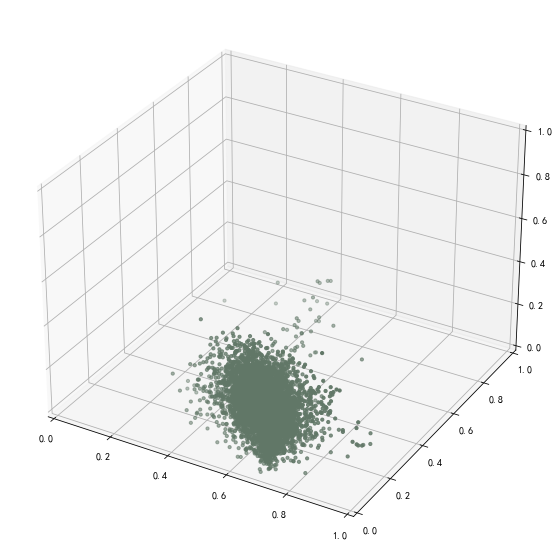

In [17]:
from scipy import stats

#根据p-value判断属性是否服从正态分布
def NM(a1):
    mean = a1.mean()
    std = a1.std()
    print(a1.name)
    print(stats.kstest(a1,'norm',(mean,std)))
    print()

NM(data['GLCM_pan'])
NM(data['Mean_Green'])
NM(data['Mean_Red'])
NM(data['Mean_NIR'])
NM(data['SD_pan'])


# 选取小于5个标准差的数据
#data = data[np.abs(data['SD_pan']- mean) <= 3*std]
def up_low(a2):
    mean = a2.mean()
    std = a2.std()
    lower = mean - 5*std
    upper = mean + 5*std
    return upper,lower
    
#获取所有异常值大于0个的数据项
aList_excep = []
for index,row in data.iterrows():  #index是行数
    flag = 0
    if((row['GLCM_pan'] > up_low(data['GLCM_pan'])[0] ) | 
       (row['GLCM_pan'] < up_low(data['GLCM_pan'])[1] )):
        flag += 1
        
    if((row['Mean_NIR'] > up_low(data['Mean_NIR'])[0] ) | 
       (row['Mean_NIR'] < up_low(data['Mean_NIR'])[1] )):
        flag += 1
        
    if((row['SD_pan'] > up_low(data['SD_pan'])[0] ) | 
       (row['SD_pan'] < up_low(data['SD_pan'])[1] )):
        flag += 1
    
    if(flag > 0):
        aList_excep.append(index)

#删除存在异常值的数据项
data_excep = data.drop(aList_excep)
print("异常数据编号：")
print(aList_excep, len(aList_excep))

#异常值删除后数据集可视化
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_excep['GLCM_pan'], data_excep['Mean_Red'], data_excep['Mean_NIR'], 
           s=10, c=None, depthshade=True, color = '#617767')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)


### 2.4.2 K-means

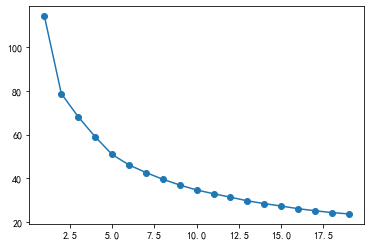

[3 0 4 ... 1 3 0]
Counter({0: 1270, 3: 1220, 4: 1214, 1: 1010, 2: 105})
[813, 821, 826, 832, 838, 839, 859, 882, 888, 973, 977, 978, 1018, 1025, 1029, 1030, 1031, 1032, 1034, 1035, 1036, 1040, 1049, 1050, 2311, 2951, 3656, 3660, 3816, 3819, 3847, 3851, 3852, 3853, 3855, 3867, 3868, 3944, 3951, 3952, 3958, 3959, 3961, 3966, 3969, 3970, 3982, 4035, 4037, 4039, 4040, 4041, 4042, 4044, 4045, 4046, 4047, 4050, 4051, 4056, 4058, 4060, 4061, 4064, 4065, 4068, 4069, 4070, 4071, 4073, 4074, 4079, 4080, 4104, 4108, 4109, 4129, 4131, 4132, 4134, 4136, 4137, 4139, 4141, 4151, 4154, 4155, 4156, 4158, 4160, 4161, 4162, 4163, 4168, 4170, 4173, 4174, 4175, 4176, 4177, 4178, 4315, 4318, 4322, 4798]


(0.0, 1.0)

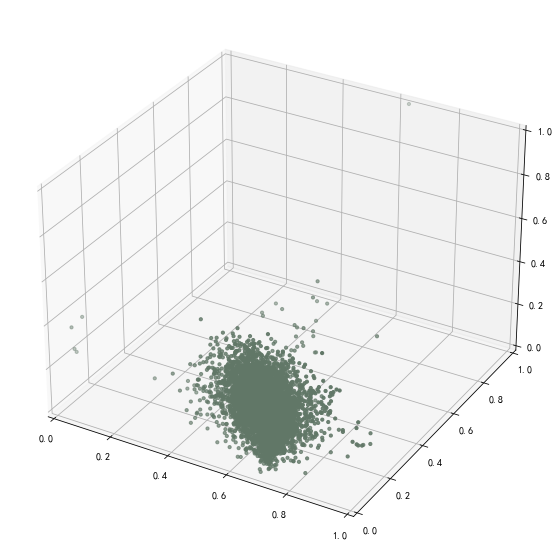

In [31]:
#多维特征数据进行聚类分析
from sklearn.cluster import KMeans
from collections import Counter

data = data.drop(['outlier'],axis=1)
values = data.values #dataframe转换为array
values = values.astype('float32') #定义数据类型


#根据k-SSE轴线图选取合适的k值
disto = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(values)
    disto.append(kmeans.inertia_)
plt.plot(range(1,20),disto,marker='o')
plt.xlabel('')
plt.ylabel('')
plt.show()

 
#选取k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(values)
print(kmeans.labels_)

count = Counter(kmeans.labels_)
print(count)

aList_cluster = []
for i in range(0,len(kmeans.labels_)):
    if (kmeans.labels_[i] == 2):
        aList_cluster.append(i)

print(aList_cluster)

data=pd.DataFrame(data) #将array还原为dataframe


#噪声数据对象删除后数据集可视化
data_cluster = data.drop(aList_cluster)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_cluster['GLCM_pan'], data_cluster['Mean_Red'], data_cluster['Mean_NIR'], 
           s=10, c=None, depthshade=True, color = '#617767')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)


## 2.5 PCA

### 2.5.1 PCA并保存结果

In [40]:
from sklearn.decomposition import PCA

#查看各维度贡献率
pca = PCA(n_components=5)
pca.fit(data)
PCA(copy=True, n_components=5, whiten=False)
print("各维度贡献率：")
print(pca.explained_variance_ratio_)

#选取前三个维度降维
pca = PCA(n_components=3)
pca.fit(data)
data_PCA = pca.transform(data)
print("PCA后数据：")
print(data_PCA)

各维度贡献率：
[0.47531396 0.22740173 0.19194002 0.10356654 0.00177775]
PCA后数据：
[[-0.07127377  0.04047695 -0.02217919]
 [-0.11902997  0.0194616  -0.03110504]
 [-0.04077552 -0.03846501  0.00464966]
 ...
 [ 0.18616899  0.004694   -0.04229459]
 [-0.05792898  0.0774227  -0.12332748]
 [-0.14595004  0.05766463 -0.00523772]]


In [45]:
#将降维后结果保存到新的csv文件
import csv
csv_file = open('Wilt_PCA.csv', 'w', newline='', encoding='gbk')

# 用csv.writer()函数创建一个writer对象。
writer = csv.writer(csv_file)

for i in range(len(data_P)):
    writer.writerow(data_P[i])
    
# 关闭文件
csv_file.close()


### 2.5.2 利用PCA结果分析上述数据预处理结果

In [46]:
#导入数据
data_PCA = pd.read_csv('./Wilt_PCA.csv', header=None)
data_PCA.columns = ['Comp1','Comp2','Comp3']

(-0.4, 0.8)

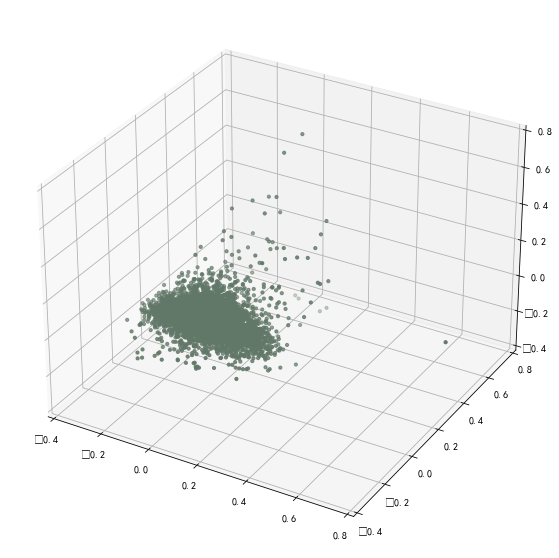

In [49]:
#绘制全部数据的三维平面图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_PCA['Comp1'], data_PCA['Comp2'], data_PCA['Comp3'], 
           s=10, c=None, depthshade=True, color = '#617767')
ax.set_xlim(-0.4,0.8)
ax.set_ylim(-0.4,0.8)
ax.set_zlim(-0.4,0.8)

         Comp1     Comp2     Comp3
0    -0.071274  0.040477 -0.022179
1    -0.119030  0.019462 -0.031105
2    -0.040776 -0.038465  0.004650
3    -0.174863  0.007199 -0.032210
4    -0.012435 -0.057503 -0.029215
...        ...       ...       ...
4728  0.084417 -0.022223 -0.018432
4729 -0.192880  0.061042 -0.093969
4730 -0.157898 -0.018326 -0.016977
4747 -0.007896 -0.112963  0.001301
4754  0.087741  0.019966 -0.082184

[261 rows x 3 columns]


(-0.4, 0.8)

D:\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


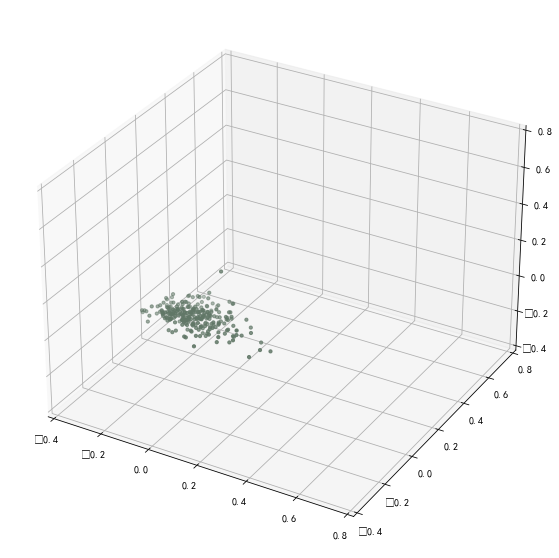

In [53]:
#获取所有outlier为yes的数据的编号

aList_outlier = []
for index,row in data.iterrows():  #index是行数
    flag = 0
    if(row['outlier'] == 'yes'):
        flag += 1
        
    if(flag == 1):
        aList_outlier.append(index)
        
data_PCA_outlier = data_PCA.loc[aList_outlier]
print(data_PCA_outlier)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_PCA_outlier['Comp1'], data_PCA_outlier['Comp2'], data_PCA_outlier['Comp3'], 
           s=10, c=None, depthshade=True, color = '#617767')


ax.set_xlim(-0.4,0.8)
ax.set_ylim(-0.4,0.8)
ax.set_zlim(-0.4,0.8)


         Comp1     Comp2     Comp3
821   0.033794  0.147159  0.283284
826   0.108572  0.313933  0.416923
851  -0.085949 -0.201422  0.020598
854  -0.018917  0.253224 -0.039589
867  -0.025970  0.277143 -0.109273
...        ...       ...       ...
4189  0.000687 -0.030184  0.084054
4191  0.145075 -0.005690  0.051419
4192  0.078371 -0.020709  0.060426
4329 -0.067013  0.031601 -0.030458
4818 -0.145950  0.057665 -0.005238

[78 rows x 3 columns]
[] <class 'list'>


D:\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


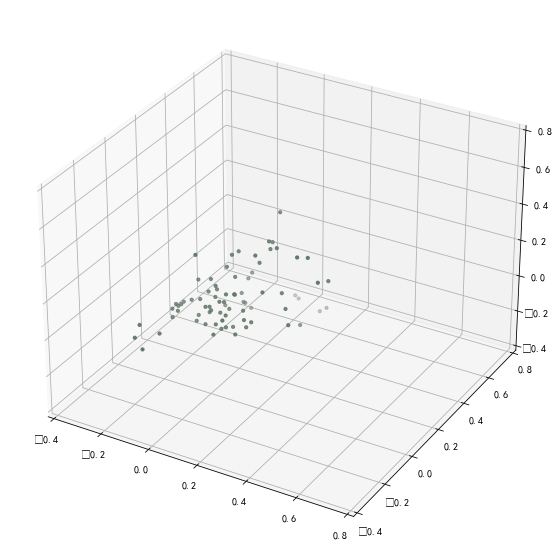

In [54]:
data1 = data_PCA.loc[aList_noise]
print(data1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data1['Comp1'], data1['Comp2'], data1['Comp3'], 
           s=10, c=None, depthshade=True, color = '#617767')

ax.set_xlim(-0.4,0.8)
ax.set_ylim(-0.4,0.8)
ax.set_zlim(-0.4,0.8)

def inter(a,b):
    return list(set(a)&set(b))

res = inter(aList_noise,aList_outlier)
print(res, type(res))
